In [8]:
pip install arch

   ---------------------------------------- 0.0/930.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/930.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/930.4 kB ? eta -:--:--
   ----------- ---------------------------- 262.1/930.4 kB ? eta -:--:--
   ----------- ---------------------------- 262.1/930.4 kB ? eta -:--:--
   --------------------- ---------------- 524.3/930.4 kB 493.7 kB/s eta 0:00:01
   --------------------- ---------------- 524.3/930.4 kB 493.7 kB/s eta 0:00:01
   --------------------- ---------------- 524.3/930.4 kB 493.7 kB/s eta 0:00:01
   -------------------------------- ----- 786.4/930.4 kB 516.0 kB/s eta 0:00:01
   -------------------------------------- 930.4/930.4 kB 527.8 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.stats.diagnostic import het_arch

from scipy.stats import norm

In [3]:
tickers = ["YESBANK.NS","EICHERMOT.NS","HAVELLS.NS","DRREDDY.NS","BHEL.NS"]
tickers
start_date = '2015-01-01'
end_date = '2024-12-31'

data = yf.download(tickers, start = start_date, end=end_date, auto_adjust=False, progress= False)['Adj Close']

data

Ticker,BHEL.NS,DRREDDY.NS,EICHERMOT.NS,HAVELLS.NS,YESBANK.NS
Date,,,,,
2015-01-01,163.570984,597.171448,1410.342163,253.236435,147.012482
2015-01-02,167.682343,599.198975,1393.671997,252.136673,150.751801
2015-01-05,166.525070,585.620605,1400.011108,254.611221,151.075287
2015-01-06,158.941910,570.210022,1363.542725,240.725845,146.841248
2015-01-07,154.617386,565.308716,1382.393799,244.025345,144.120026
...,...,...,...,...,...
2024-12-23,240.444748,1332.896606,4689.740234,1650.290527,19.910000
2024-12-24,238.848114,1342.386353,4731.547852,1663.505859,19.799999
2024-12-26,241.243073,1346.609619,4739.890137,1665.741699,19.799999


In [4]:
price_df = (data.reset_index().melt(id_vars="Date", var_name="Ticker", value_name="Adj_Close").dropna().sort_values(["Ticker", "Date"])
            .reset_index(drop=True))

In [5]:
price_df.sample(5)

,Date,Ticker,Adj_Close
11594,2022-01-05,YESBANK.NS,14.500000
10925,2019-04-24,YESBANK.NS,235.913864
3346,2018-07-24,DRREDDY.NS,397.040955
12322,2024-12-18,YESBANK.NS,20.620001
7653,2016-01-14,HAVELLS.NS,267.440826


In [6]:
print(price_df['Date'].min(), price_df['Date'].max())

2015-01-01 00:00:00 2024-12-30 00:00:00


In [7]:
price_df.isnull().sum()

Date         0
Ticker       0
Adj_Close    0
dtype: int64

In [8]:
price_df.groupby('Ticker').size()

Ticker
BHEL.NS         2466
DRREDDY.NS      2466
EICHERMOT.NS    2466
HAVELLS.NS      2466
YESBANK.NS      2466
dtype: int64

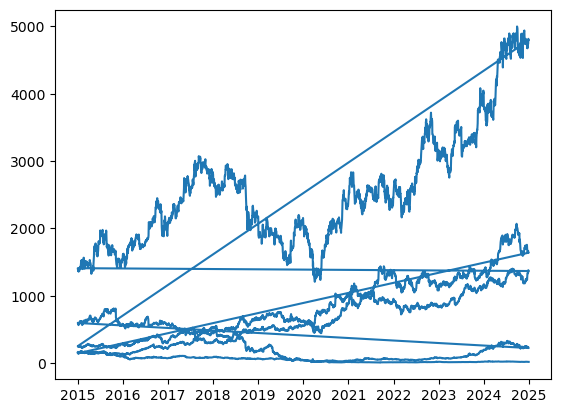

In [9]:
plt.plot(price_df['Date'], price_df['Adj_Close'])

In [10]:
price_df

,Date,Ticker,Adj_Close
0,2015-01-01,BHEL.NS,163.570984
1,2015-01-02,BHEL.NS,167.682343
2,2015-01-05,BHEL.NS,166.525070
3,2015-01-06,BHEL.NS,158.941910
4,2015-01-07,BHEL.NS,154.617386
...,...,...,...
12325,2024-12-23,YESBANK.NS,19.910000
12326,2024-12-24,YESBANK.NS,19.799999
12327,2024-12-26,YESBANK.NS,19.799999
12328,2024-12-27,YESBANK.NS,19.820000


In [11]:
price_clean = price_df.sort_values(['Ticker','Date'])
price_clean

,Date,Ticker,Adj_Close
0,2015-01-01,BHEL.NS,163.570984
1,2015-01-02,BHEL.NS,167.682343
2,2015-01-05,BHEL.NS,166.525070
3,2015-01-06,BHEL.NS,158.941910
4,2015-01-07,BHEL.NS,154.617386
...,...,...,...
12325,2024-12-23,YESBANK.NS,19.910000
12326,2024-12-24,YESBANK.NS,19.799999
12327,2024-12-26,YESBANK.NS,19.799999
12328,2024-12-27,YESBANK.NS,19.820000


In [12]:
price_clean['Log_Return'] = price_clean.groupby('Ticker')['Adj_Close'].transform(lambda x: np.log(x/x.shift(1)))
price_clean

,Date,Ticker,Adj_Close,Log_Return
0,2015-01-01,BHEL.NS,163.570984,NaN
1,2015-01-02,BHEL.NS,167.682343,0.024824
2,2015-01-05,BHEL.NS,166.525070,-0.006926
3,2015-01-06,BHEL.NS,158.941910,-0.046607
4,2015-01-07,BHEL.NS,154.617386,-0.027585
...,...,...,...,...
12325,2024-12-23,YESBANK.NS,19.910000,0.004026
12326,2024-12-24,YESBANK.NS,19.799999,-0.005540
12327,2024-12-26,YESBANK.NS,19.799999,0.000000
12328,2024-12-27,YESBANK.NS,19.820000,0.001010


In [13]:
return_df = price_clean.dropna().reset_index(drop=True)
return_df


,Date,Ticker,Adj_Close,Log_Return
0,2015-01-02,BHEL.NS,167.682343,0.024824
1,2015-01-05,BHEL.NS,166.525070,-0.006926
2,2015-01-06,BHEL.NS,158.941910,-0.046607
3,2015-01-07,BHEL.NS,154.617386,-0.027585
4,2015-01-08,BHEL.NS,156.871017,0.014470
...,...,...,...,...
12320,2024-12-23,YESBANK.NS,19.910000,0.004026
12321,2024-12-24,YESBANK.NS,19.799999,-0.005540
12322,2024-12-26,YESBANK.NS,19.799999,0.000000
12323,2024-12-27,YESBANK.NS,19.820000,0.001010


In [55]:
weights = {"YESBANK.NS": 0.20,
    "EICHERMOT.NS": 0.20,
    "HAVELLS.NS": 0.20,
    "DRREDDY.NS": 0.20,
    "BHEL.NS":0.20}



In [56]:
return_wide = return_df.pivot(index='Date',columns='Ticker',values='Log_Return').sort_index()
return_wide

Ticker,BHEL.NS,DRREDDY.NS,EICHERMOT.NS,HAVELLS.NS,YESBANK.NS
Date,,,,,
2015-01-02,0.024824,0.003389,-0.011890,-0.004352,0.025117
2015-01-05,-0.006926,-0.022922,0.004538,0.009766,0.002144
2015-01-06,-0.046607,-0.026667,-0.026394,-0.056079,-0.028426
2015-01-07,-0.027585,-0.008633,0.013730,0.013613,-0.018706
2015-01-08,0.014470,0.008877,-0.005779,0.027962,0.015460
...,...,...,...,...,...
2024-12-23,0.023728,-0.001713,0.003384,0.002079,0.004026
2024-12-24,-0.006662,0.007094,0.008875,0.007976,-0.005540
2024-12-26,0.009977,0.003141,0.001762,0.001343,0.000000


In [57]:
weight_vector = np.array([weights[col] for col in return_wide.columns])
weight_vector

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [58]:
return_wide['Portfolio_return'] = return_wide.values @ weight_vector


In [59]:
return_wide

Ticker,BHEL.NS,DRREDDY.NS,EICHERMOT.NS,HAVELLS.NS,YESBANK.NS,Portfolio_return
Date,,,,,,
2015-01-02,0.024824,0.003389,-0.011890,-0.004352,0.025117,0.007418
2015-01-05,-0.006926,-0.022922,0.004538,0.009766,0.002144,-0.002680
2015-01-06,-0.046607,-0.026667,-0.026394,-0.056079,-0.028426,-0.036835
2015-01-07,-0.027585,-0.008633,0.013730,0.013613,-0.018706,-0.005516
2015-01-08,0.014470,0.008877,-0.005779,0.027962,0.015460,0.012198
...,...,...,...,...,...,...
2024-12-23,0.023728,-0.001713,0.003384,0.002079,0.004026,0.006301
2024-12-24,-0.006662,0.007094,0.008875,0.007976,-0.005540,0.002349
2024-12-26,0.009977,0.003141,0.001762,0.001343,0.000000,0.003245


In [60]:
portfolio_returns = return_wide[['Portfolio_return']].reset_index()

In [61]:
portfolio_returns

Ticker,Date,Portfolio_return
0,2015-01-02,0.007418
1,2015-01-05,-0.002680
2,2015-01-06,-0.036835
3,2015-01-07,-0.005516
4,2015-01-08,0.012198
...,...,...
2460,2024-12-23,0.006301
2461,2024-12-24,0.002349
2462,2024-12-26,0.003245
2463,2024-12-27,-0.000187


In [62]:
portfolio_returns['Portfolio_return'].mean()

0.00018030503077822338

In [63]:
portfolio_returns['Portfolio_return'].std()

0.015081899622349853

In [64]:
portfolio_returns.set_index('Date', inplace=True)

In [65]:
portfolio_returns

Ticker,Portfolio_return
Date,
2015-01-02,0.007418
2015-01-05,-0.002680
2015-01-06,-0.036835
2015-01-07,-0.005516
2015-01-08,0.012198
...,...
2024-12-23,0.006301
2024-12-24,0.002349
2024-12-26,0.003245


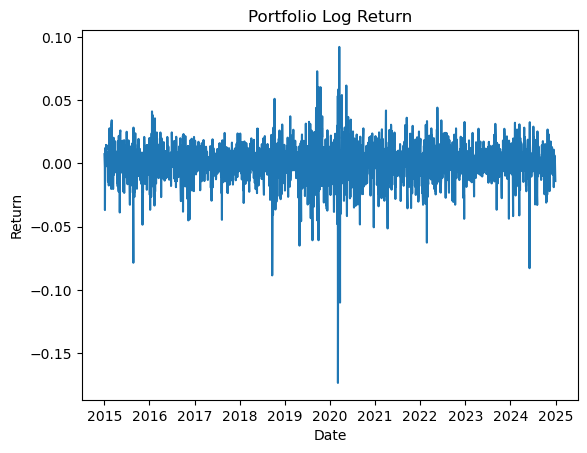

In [66]:

plt.Figure(figsize=(12,5))
plt.plot(portfolio_returns['Portfolio_return'])
plt.title('Portfolio Log Return')
plt.xlabel('Date')
plt.ylabel('Return')
plt.show()

In [67]:
returns = (portfolio_returns['Portfolio_return'])
arch_test   = het_arch(returns)
lables = ['LM Stat','LM p-Value','F Stat','F p-Value']
dict(zip(lables, arch_test))



{'LM Stat': 276.9687346132253,
 'LM p-Value': 1.1350880619196798e-53,
 'F Stat': 31.0790574107997,
 'F p-Value': 4.6109972358569083e-57}

In [68]:
returns_scaled = portfolio_returns['Portfolio_return']*100

In [69]:
returns_scaled

Date
2015-01-02    0.741769
2015-01-05   -0.267978
2015-01-06   -3.683474
2015-01-07   -0.551596
2015-01-08    1.219832
                ...   
2024-12-23    0.630095
2024-12-24    0.234858
2024-12-26    0.324461
2024-12-27   -0.018681
2024-12-30   -1.391074
Name: Portfolio_return, Length: 2465, dtype: float64

In [70]:
garch_model = arch_model(returns_scaled,mean='Constant',vol='GARCH',p = 1,q = 1, dist='normal')

In [71]:
garch_result = garch_model.fit(disp='off')
print(garch_result.summary)



<bound method ARCHModelResult.summary of                      Constant Mean - GARCH Model Results                      
Dep. Variable:       Portfolio_return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -4307.12
Distribution:                  Normal   AIC:                           8622.25
Method:            Maximum Likelihood   BIC:                           8645.49
                                        No. Observations:                 2465
Date:                Fri, Jan 02 2026   Df Residuals:                     2464
Time:                        15:54:03   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0556  

In [72]:
# Time-Varying Risk. what was the portfolio risk on each day

portfolio_returns['GARCH_Volatility'] = garch_result.conditional_volatility


In [73]:
portfolio_returns['Rolling_30D_Vol'] = returns_scaled.rolling(30).std()

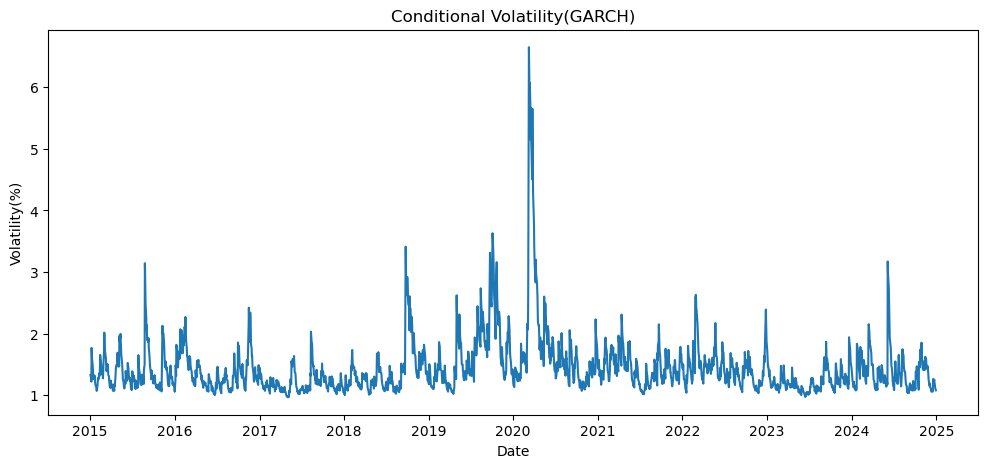

In [74]:
plt.figure(figsize=(12,5))
plt.plot(portfolio_returns['GARCH_Volatility'])
plt.title('Conditional Volatility(GARCH)')
plt.xlabel('Date')
plt.ylabel('Volatility(%)')
plt.show()


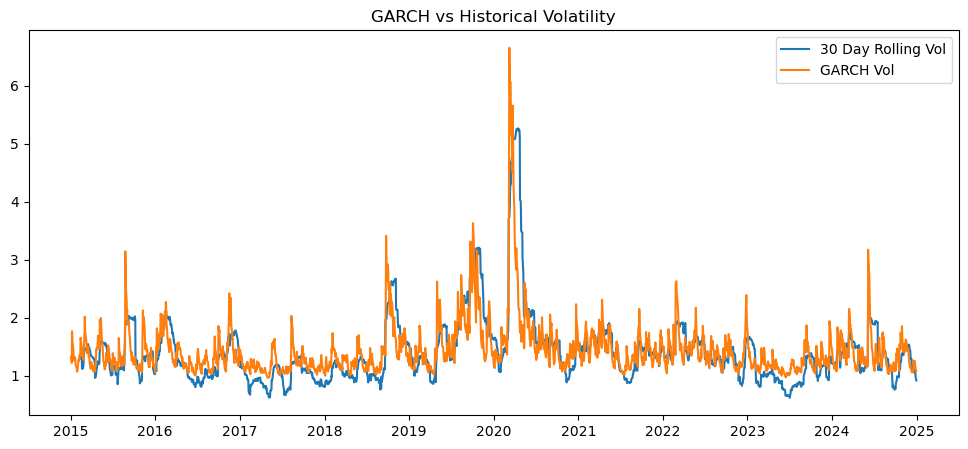

In [75]:

plt.figure(figsize=(12,5))
plt.plot(portfolio_returns['Rolling_30D_Vol'], label = '30 Day Rolling Vol')
plt.plot(portfolio_returns['GARCH_Volatility'], label = 'GARCH Vol')
plt.legend()
plt.title('GARCH vs Historical Volatility')
plt.show()

In [76]:
portfolio_returns

Ticker,Portfolio_return,GARCH_Volatility,Rolling_30D_Vol
Date,,,
2015-01-02,0.007418,1.327178,NaN
2015-01-05,-0.002680,1.278841,NaN
2015-01-06,-0.036835,1.219782,NaN
2015-01-07,-0.005516,1.766969,NaN
2015-01-08,0.012198,1.648327,NaN
...,...,...,...
2024-12-23,0.006301,1.252341,1.086030
2024-12-24,0.002349,1.209292,1.048288
2024-12-26,0.003245,1.157377,1.046645


In [77]:
forcast = garch_result.forecast(horizon=11)
vol_forcast = (forcast.variance.iloc[-1]**5)
vol_forcast

h.01     4.622202
h.02     5.840304
h.03     7.192599
h.04     8.665721
h.05    10.244551
h.06    11.912951
h.07    13.654396
h.08    15.452497
h.09    17.291410
h.10    19.156146
h.11    21.032798
Name: 2024-12-30 00:00:00, dtype: float64

In [78]:
# why VaR needed
# VaR says: With 99% confidence, the portfolio will not lose more than X% in one day
# What is the maximum loss I can expect over a given time period with high confidence?
# VaR does not tell you how bad the worst loss is — only the threshold
# CVaR is the expected loss given that the loss has exceeded VaR.
# CVaR - If things go really bad, how bad on average?

In [79]:
var_95_hist = -np.percentile(returns, 5)
var_99_hist  = -np.percentile(returns,1)
var_95_hist , var_99_hist

(0.02367279376611161, 0.04161486023968463)

Historical VaR and CVaR

In [80]:
def historical_var_cvar(returns, alpha=0.05):
    var = np.percentile(returns, alpha * 100)
    cvar = returns[returns <= var].mean()
    return var, cvar


In [81]:
hvar_95, hcvar_95 = historical_var_cvar(returns, 0.05)
hvar_99, hcvar_99 = historical_var_cvar(returns, 0.01)

hvar_95, hcvar_95, hvar_99, hcvar_99


(-0.02367279376611161,
 -0.036518043593653446,
 -0.04161486023968463,
 -0.06261622041113216)

In [ ]:
# On 95% of trading days, the portfolio will not lose more than 2.37% in a single day (-0.02367279376611161)
# On the worst 5% of days, the average loss is 3.65% (-0.036518043593653446)
# On 99% of days, the portfolio will not lose more than 4.16%.( -0.04161486023968463)
# On the worst 1% of days, the average loss is almost 6%.(  -0.06261622041113216)
# Normal days → losses manageable (<1.5%)
# Stress days → losses double quickly
# Crisis days → losses approach 5% (2020)

Parametric VaR and CVaR

In [83]:
mu = returns.mean()
sigma = returns.std()

In [84]:
def parametric_var_cvar(mu, sigma, alpha):
    z = norm.ppf(alpha)
    var = mu + z*sigma
    cvar = mu - sigma * (norm.pdf(z) / alpha)
    return var, cvar

In [85]:
pvar_95,pcvar_95 = parametric_var_cvar(mu,sigma,alpha = 0.05)
pvar_99,pcvar_99 = parametric_var_cvar(mu,sigma,alpha = 0.01)

In [86]:
print(f' at 99% pvar is {pvar_99} and cvar is {pcvar_99}')

 at 99% pvar is -0.03490544009217272 and cvar is -0.04001618831253667


In [ ]:
# Only 1% of days will have losses worse than 3.49%.
# When things go extremely wrong, average loss approaches 4%.

In [88]:
# this reflects Crisis risk (COVID-like events)

In [89]:
#GARCH-BASED CONDITIONAL VaR & CVaR
#Volatility changes daily
#Risk is conditional on today’s market state
#VaR(t,α) = μ+zα*σt
#CVaR(t,α)=μ−σt*(ϕzα/α)

In [90]:
sigma_t = portfolio_returns['GARCH_Volatility']/100

In [91]:
def garch_var_cvar(mu, sigma_t, alpha):
    z = norm.ppf(alpha)
    var = mu + z * sigma_t
    cvar = mu - sigma_t * (norm.pdf(z) / alpha)
    return var, cvar

In [92]:
portfolio_returns["VaR_95"], portfolio_returns["CVaR_95"] = garch_var_cvar(mu, sigma_t, 0.05)
portfolio_returns["VaR_99"], portfolio_returns["CVaR_99"] = garch_var_cvar(mu, sigma_t, 0.01)

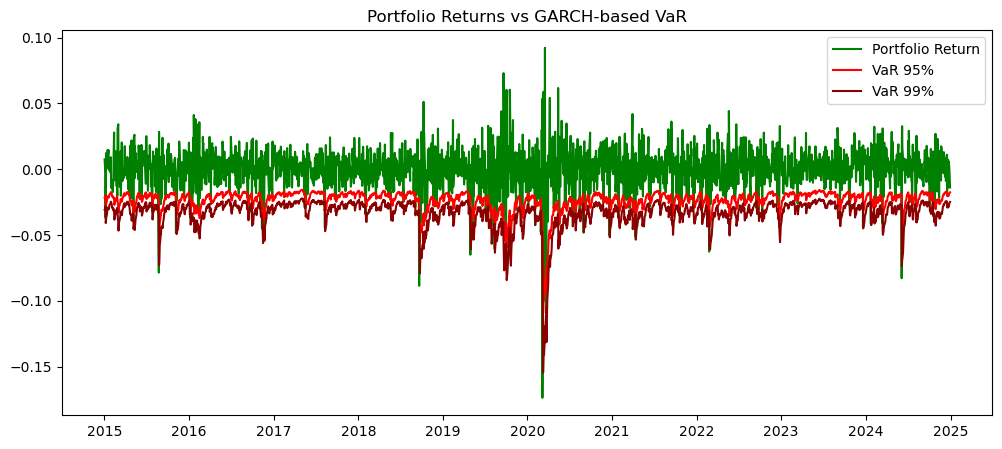

In [96]:
plt.figure(figsize=(12,5))
plt.plot(returns, label="Portfolio Return", color="green")
plt.plot(portfolio_returns["VaR_95"], label="VaR 95%", color="red")
plt.plot(portfolio_returns["VaR_99"], label="VaR 99%", color="darkred")
plt.legend()
plt.title("Portfolio Returns vs GARCH-based VaR")
plt.show()

BACKTESTING VaR
Returnt<VaRt

In [94]:
portfolio_returns["VaR_95_violation"] = returns < portfolio_returns["VaR_95"]
portfolio_returns["VaR_99_violation"] = returns < portfolio_returns["VaR_99"]
portfolio_returns["VaR_95_violation"].mean(), portfolio_returns["VaR_99_violation"].mean()

(0.05070993914807302, 0.018255578093306288)

In [95]:
# 5% and 1% → Model is well calibrated